In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

In [4]:
bbh_astro = Table.read('bbh_astro.dat', format='ascii')
distribution_samples = Table.read('distribution_samples.dat', format='ascii')

bbh_astro['log10_distance'] = np.log10(bbh_astro['distance'])
distribution_samples['log10_distance'] = np.log10(distribution_samples['distance'])

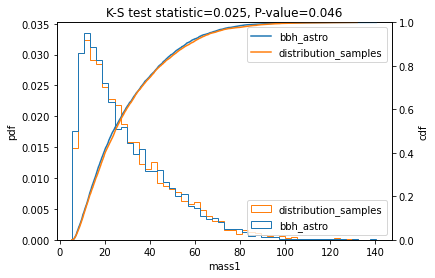

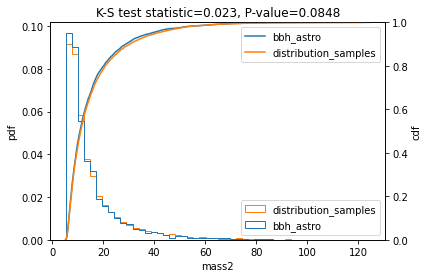

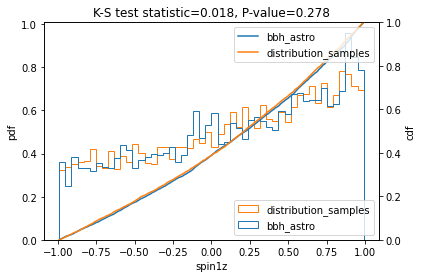

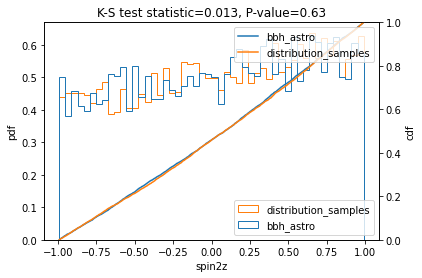

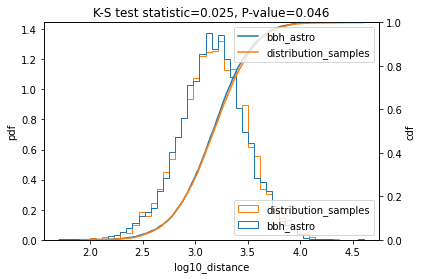

In [5]:
for col in ['mass1', 'mass2', 'spin1z', 'spin2z', 'log10_distance']:
    fig, ax = plt.subplots()
    ax.hist(
        [bbh_astro[col], distribution_samples[col]],
        label=['bbh_astro', 'distribution_samples'],
        histtype='step',
        density=1,
        bins=50)
    ax.set_ylim(0, None)
    ax.set_ylabel('pdf')
    ax2 = ax.twinx()
    ax2.set_ylabel('cdf')
    ax2.set_ylim(0, 1)
    ax2.plot(np.sort(bbh_astro[col]), np.linspace(0, 1, len(bbh_astro)), label='bbh_astro')
    ax2.plot(np.sort(distribution_samples[col]), np.linspace(0, 1, len(distribution_samples)), label='distribution_samples')
    ax.legend(loc='lower right')
    ax2.legend(loc='upper right')
    stat, pvalue = ks_2samp(bbh_astro[col], distribution_samples[col])
    ax.set_xlabel(col)
    ax.set_title(f'K-S test statistic={stat:0.3f}, P-value={pvalue:0.3g}')
    fig.savefig(f'ks_{col}.png', dpi=300)